In [1]:
#Importing libraries
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

#Reading the dataframe
df = pd.read_csv("reddit_data.csv")

In [2]:
df

,username,subreddit,utc
0,kabanossi,photoshopbattles,1.482748e+09
1,kabanossi,GetMotivated,1.482748e+09
2,kabanossi,vmware,1.482748e+09
3,kabanossi,carporn,1.482748e+09
4,kabanossi,DIY,1.482747e+09
...,...,...,...
13999995,RushNY,iOSthemes,1.405371e+09
13999996,RushNY,iOSthemes,1.404528e+09
13999997,RushNY,cars,1.404230e+09
13999998,RushNY,Toyota,1.404143e+09


In [3]:
#Drop datetime column
df.drop(['utc'], inplace=True, axis=1)

#Finding number of usernames and subreddits
users = df.username.unique().tolist()
subs = df.subreddit.unique().tolist()
print('Number of Usernames: {}'.format(len(users)))
print('Number of Subreddits: {}'.format(len(subs)))

Number of Usernames: 22610
Number of Subreddits: 34967


In [4]:
df

,username,subreddit
0,kabanossi,photoshopbattles
1,kabanossi,GetMotivated
2,kabanossi,vmware
3,kabanossi,carporn
4,kabanossi,DIY
...,...,...
13999995,RushNY,iOSthemes
13999996,RushNY,iOSthemes
13999997,RushNY,cars
13999998,RushNY,Toyota


In [5]:
#Finding each user's total number of comments for each subreddit
dftot = df.groupby(['username','subreddit']).size().reset_index(name="tot_comments")

#Finding each user's max number of comments for all subreddits
dfmax = dftot.groupby(['username'])['tot_comments'].max().reset_index(name="max_comments")

#Merging total and max comments onto new dataframe
dfnew = pd.merge(dftot, dfmax, on='username', how='left')

#Calculate a user's subreddit rating based on total and max comments
dfnew['rating'] = dfnew['tot_comments']/dfnew['max_comments']*10

user_feat1={}
user_feat2={}
subreddit_feat1={}
import random
# for i in range(892462):
#     feat1.append(random.randint(1,10))
#     feat2.append(random.randint(1,10))
#     feat3.append(random.randint(1,10))
# for user in users:
#     user_feat1[user]=random.randint(1,10)
#     user_feat2[user]=random.randint(1,10)
# for sub in subs:
#     subreddit_feat1[sub]=random.randint(1,10)

print("fuck1")

# dftot['user_feat1'] = user_feat1[dftot['username']]

# dftot['user_feat1'] = dftot['username'].apply(lambda x: user_feat1[x])
# dftot['user_feat2'] = dftot['username'].apply(lambda x: user_feat2[x])
# dftot['subreddit_feat1'] = dftot['subreddit'].apply(lambda x: subreddit_feat1[x])



#删除username和subreddit相同的行
dftot = dftot[-((dftot['username']==dftot['subreddit']) )]


# dftot['user_feat1']=12
# dftot['user_feat2']=12
# dftot['subreddit_feat1']=12
# for i in range(892462):
#     print("i=",i)
#     dftot['user_feat1'][i]=user_feat1[dftot['username'][i]]
#     dftot['user_feat2'][i]=user_feat2[dftot['username'][i]]
#     dftot['subreddit_feat1'][i]=subreddit_feat1[dftot['subreddit'][i]]

fuck1


In [6]:
dftot

,username,subreddit,tot_comments,user_feat1,user_feat2,subreddit_feat1
0,--ANUSTART-,AOImmortals,2,6,3,5
1,--ANUSTART-,Addons4Kodi,1,6,3,5
2,--ANUSTART-,AdviceAnimals,7,6,3,7
3,--ANUSTART-,AskReddit,14,6,3,9
4,--ANUSTART-,Assistance,9,6,3,2
...,...,...,...,...,...,...
892457,zzy_,summonerschool,170,3,10,1
892458,zzy_,symphonicmetal,5,3,10,7
892459,zzy_,tifu,2,3,10,3
892460,zzy_,todayilearned,8,3,10,7


In [7]:
import praw

reddit = praw.Reddit(
    client_id="0nd6ZYsD4ATSitakqlF9Lw",
    client_secret="kPy0JkFSfpbYhQcH0Jlud589NSwzyA",
    user_agent="android:com.example.myredditapp:v1.2.3 (by u/Beginning-Client-786)",
    username="Beginning-Client-786",
    password="JJf9i-3*Dc",
)
cnt_karma=0
def getCommentKarma(redditor_name):
    global cnt_karma
    print("============================================================")
    print(str(cnt_karma)+":")
    cnt_karma+=1
    karma=0
    try:
        karma=reddit.redditor(redditor_name).comment_karma
    except:
        print("something_wrong_with_this_user")
        return "something_wrong_with_this_user"
    if karma!=0:
        print("karma:",karma)
        return karma
    else:
        print("no_karma")
        return "no_karma"

cnt_link_karma=0

def getLinkKarma(redditor_name):
    global cnt_link_karma
    print("============================================================")
    print(str(cnt_link_karma)+":")
    cnt_link_karma+=1
    karma=0
    try:
        karma=reddit.redditor(redditor_name).link_karma
    except:
        print("something_wrong_with_this_user")
        return "something_wrong_with_this_user"
    if karma!=0:
        print("karma:",karma)
        return karma
    else:
        print("no_karma")
        return "no_karma"

def getIsMod(redditor_name):
    global cnt
    print("============================================================")
    print(str(cnt)+":")
    cnt+=1
    is_mod=""
    try:
        is_mod=reddit.redditor(redditor_name).is_mod
    except:
        print("something_wrong_with_this_user")
        return "something_wrong_with_this_user"
    if is_mod!="":
        print("is_mod:",is_mod)
        return is_mod
    else:
        print("no_is_mod")
        return "no_is_mod"

def getIsEmployee(redditor_name):
    global cnt
    print("============================================================")
    print(str(cnt)+":")
    cnt+=1
    is_employee=""
    try:
        is_employee=reddit.redditor(redditor_name).is_employee
    except:
        print("something_wrong_with_this_user")
        return "something_wrong_with_this_user"
    if is_employee!="":
        print("is_employee:",is_employee)
        return is_employee
    else:
        print("no_is_employee")
        return "no_is_employee"

def getIsFriend(redditor_name):
    global cnt
    print("============================================================")
    print(str(cnt)+":")
    cnt+=1
    is_friend=""
    try:
        is_friend=reddit.redditor(redditor_name).is_friend
    except:
        print("something_wrong_with_this_user")
        return "something_wrong_with_this_user"
    if is_friend!="":
        print("is_friend:",is_friend)
        return is_friend
    else:
        print("no_is_friend")
        return "no_is_friend"

cnt=0
def getWords(redditor_name):
    global cnt
    print("============================================================")
    print(str(cnt)+":")
    cnt+=1
    words=""
    try:
        for submission in reddit.redditor(redditor_name).submissions.top(limit=10):#time_filter="all"
            words+=submission.selftext
    except:
        print("something_wrong_with_this_user")
        return "something_wrong_with_this_user"
    if words!="":
        print("words:",words[0:100])
        return words
    else:
        print("no_words")
        return "no_words"

cnt_description=0
def getDescription(subreddit_name):
    subreddit = reddit.subreddit(subreddit_name)
    global cnt_description
    print("============================================================")
    print(str(cnt_description)+":")
    cnt_description+=1
    description=""
    try:
        description=subreddit.description
    except:
        print("something_wrong_with_this_subreddit")
        return "something_wrong_with_this_subreddit"
    if description!="":
        print("description:",description[0:100])
        return description
    else:
        print("no_description")
        return "no_description"

In [8]:
##########################
sample1k=False
##########################


dftot.drop_duplicates(inplace=True)
if sample1k:
    dftot=dftot.sample(1000,replace=False,axis=0)#太慢了，正常的话nodes_user有22611个，nodes_subreddit有34927个，edges有892398个
else:
    dftot=dftot.sample(frac=0.5,replace=False,axis=0)
    
dfuser=dftot[['username']].copy()
dfuser.drop_duplicates(inplace=True)
dfsubreddit=dftot[['subreddit','subreddit_feat1']].copy()
dfsubreddit.drop_duplicates(inplace=True)
dfedges=dftot[['username','subreddit','tot_comments']].copy()

In [ ]:
if sample1k:
    dfedges.to_csv('edges_1000.csv',index=False)
else:
    dfedges.to_csv('edges_all.csv',index=False)#记得上面没sample1000的话这里才保存了个all

In [ ]:
dfsubreddit['words']=dfsubreddit['subreddit'].progress_apply(lambda x: getDescription(x))
if sample1k:
    dfsubreddit.to_csv('nodes_subreddit_1000.csv',index=False)
else:
    dfsubreddit.to_csv('nodes_subreddit_all.csv',index=False)

In [9]:
from tqdm.notebook import tqdm
tqdm.pandas()

dfuser['words']=dfuser['username'].progress_apply(lambda x: getWords(x))
print("fuck")
dfuser['comment_karma']=dfuser['username'].progress_apply(lambda x: getCommentKarma(x))
dfuser['link_karma']=dfuser['username'].progress_apply(lambda x: getLinkKarma(x))
dfuser['is_mod']=dfuser['username'].progress_apply(lambda x: getIsMod(x))
dfuser['is_employee']=dfuser['username'].progress_apply(lambda x: getIsEmployee(x))
dfuser['is_friend']=dfuser['username'].progress_apply(lambda x: getIsFriend(x))
if sample1k:
    dfuser.to_csv('nodes_user_1000.csv',index=False)
else:
    dfuser.to_csv('nodes_user_all.csv',index=False)

  0%|          | 0/945 [00:00<?, ?it/s]

0:
something_wrong_with_this_user
1:
words: Fuck the Pens.
2:
words: I plan to remove it with an easy out but I understand it is unmarked.
3:
words: Does anyone know if it's possible at all to convert to paganism by educating your heir with a zealou
4:
no_words
5:
no_words
6:
something_wrong_with_this_user
7:
words: I am surprised this doesn't exist yet, maybe because people are worried about taxes. 

I would love 
8:
no_words
9:
no_words
10:
words: We are a capital city. The queens gem. We welcome millions of visitors every year. The current servi
11:
no_words
12:
something_wrong_with_this_user
13:
no_words
14:
words: In the past, PT drafts were almost always played in English regardless of where they were, which mad
15:
words: I'm a janitor at one of the biggest party colleges in the country. I've seen some shit. AMA.

**My P
16:
something_wrong_with_this_user
17:
no_words
18:
something_wrong_with_this_user
19:
words: It's a girl! fiancee and I are overjoyed :)And I'm super excited, 

In [25]:
# dfedges.to_csv('edges_1000.csv',index=False)
# dfuser.to_csv('nodes_user_1000.csv',index=False)
# dfsubreddit.to_csv('nodes_subreddit_1000.csv',index=False)

In [26]:
dfuser

,username,user_feat1,user_feat2,words
74613,CarsThatDrive,1,2,something_wrong_with_this_user
37013,AssDotCom,7,7,Fuck the Pens.
686899,lawrnk,4,8,I plan to remove it with an easy out but I und...
423419,TheFenixKnight,1,9,Does anyone know if it's possible at all to co...
155615,GageTheElephant,1,7,no_words
...,...,...,...,...
131396,Eltex,2,4,Bastrop County Sheriff's Office:\n\nInformatio...
833570,teki-toe,9,5,Is this normal and legal? Should i report this...
115114,DixieWreckedJedi,1,10,no_words
725170,mulder_scully,2,1,I picked up the game last Monday on a whim at ...


In [28]:
df = pd.read_csv("nodes_subreddit_1000.csv")
df

,subreddit,subreddit_feat1,words
0,gaming,1,"**If your submission does not appear, do not d..."
1,psychology,3,###We now have user flair! Please message the ...
2,DIY,6,[](#/RES_SR_Config/NightModeCompatible)\n\n> #...
3,Justrolledintotheshop,8,For those absolutely stupid things that you se...
4,tattoos,6,"# Hey there, welcome to /r/tattoos. Please re..."
...,...,...,...
649,RoCirclejerk,4,Locul unde intelectualii din Romania poartă di...
650,DynastyFF,5,##Welcome to \/r/DynastyFF \n\n>### About \/...
651,UsenetInvites,8,>Menu\n\n>#\n>* Discussion\n>* [**r/usenet**](...
652,friendsafari,7,[](#DO_NOT_USE)\n\n###### **[Get Your New Flai...


In [ ]:
#####################################################################################################

In [12]:
dfnew

,username,subreddit,tot_comments,max_comments,rating
0,--ANUSTART-,AOImmortals,2,117,0.170940
1,--ANUSTART-,Addons4Kodi,1,117,0.085470
2,--ANUSTART-,AdviceAnimals,7,117,0.598291
3,--ANUSTART-,AskReddit,14,117,1.196581
4,--ANUSTART-,Assistance,9,117,0.769231
...,...,...,...,...,...
892457,zzy_,summonerschool,170,396,4.292929
892458,zzy_,symphonicmetal,5,396,0.126263
892459,zzy_,tifu,2,396,0.050505
892460,zzy_,todayilearned,8,396,0.202020


In [13]:
#Create new dataframe and drop duplicate users
dfusers = df.drop_duplicates(subset='username')
#Drop subs
dfusers.drop(['subreddit'], inplace=True, axis=1)
#Sort by users
dfusers = dfusers.sort_values(['username'], ascending=True)
#Reset index
dfusers.reset_index(drop=True, inplace=True)
#Create user id from index
dfusers['user_id'] = dfusers.index+1

#Create new dataframe and drop duplicate subs
dfsubs = df.drop_duplicates(subset='subreddit')
#Drop users
dfsubs.drop(['username'], inplace=True, axis=1)
#Sort by subs
dfsubs = dfsubs.sort_values(['subreddit'], ascending=True)
#Reset index
dfsubs.reset_index(drop=True, inplace=True)
#Create user id from index
dfsubs['sub_id'] = dfsubs.index+1

#Merging user id onto dataframe, moving position
dfnew = pd.merge(dfnew, dfusers, on='username', how='left')
move_pos = dfnew.pop('user_id')
dfnew.insert(1, 'user_id', move_pos)
#Merging sub id onto dataframe, moving position
dfnew = pd.merge(dfnew, dfsubs, on='subreddit', how='left')
move_pos = dfnew.pop('sub_id')
dfnew.insert(3, 'sub_id', move_pos)

C:\Users\miao\AppData\Local\Temp\ipykernel_21012\321668290.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfusers.drop(['subreddit'], inplace=True, axis=1)
C:\Users\miao\AppData\Local\Temp\ipykernel_21012\321668290.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsubs.drop(['username'], inplace=True, axis=1)


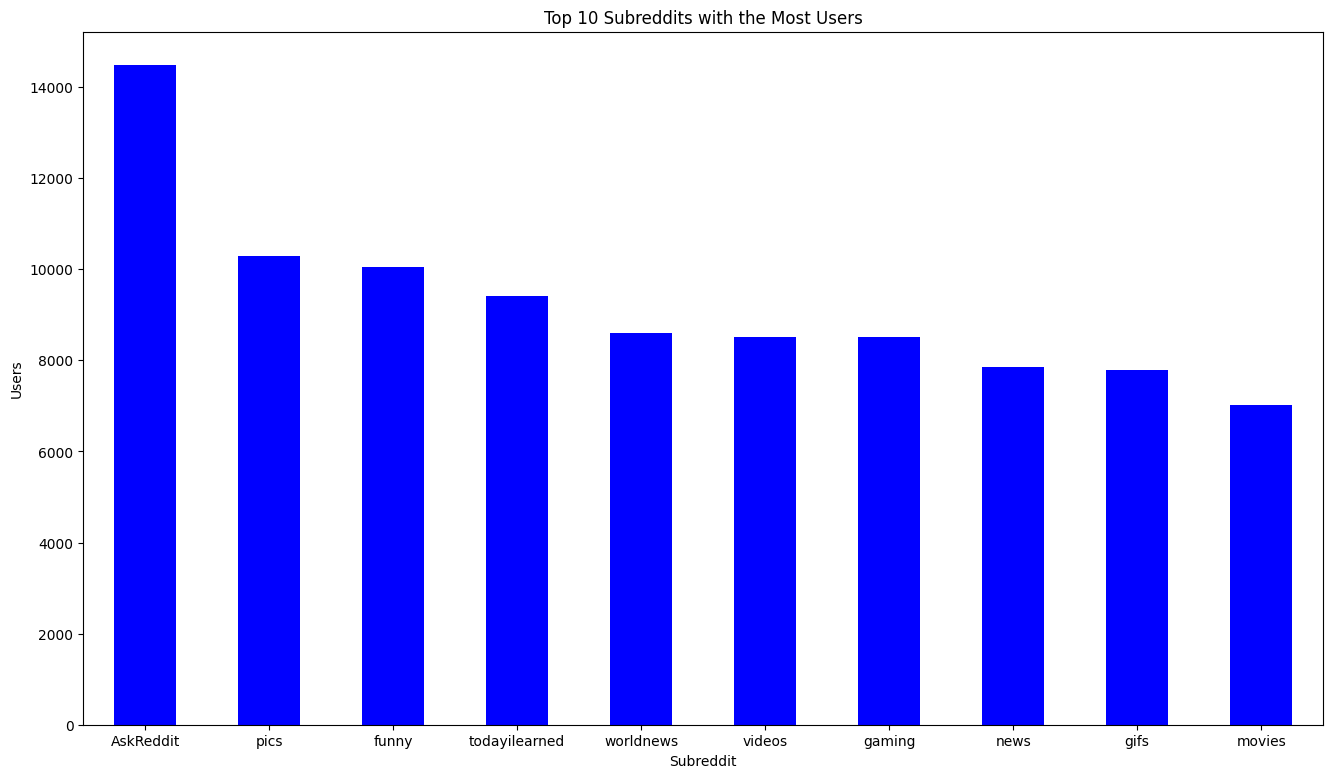

In [14]:

#Counting number of users in each subreddit
dfcounts = dfnew['subreddit'].value_counts().rename_axis('subreddit').reset_index(name='tot_users').head(10)

#Plotting the Top 10 Subreddits with the Most Users
plt.rcParams["figure.figsize"] = (16,9)
dfcounts.plot.bar(x='subreddit', y='tot_users', rot=0, legend=None, color=['blue'])
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.title('Top 10 Subreddits with the Most Users')
plt.xlabel('Subreddit')
plt.ylabel('Users')
plt.show()

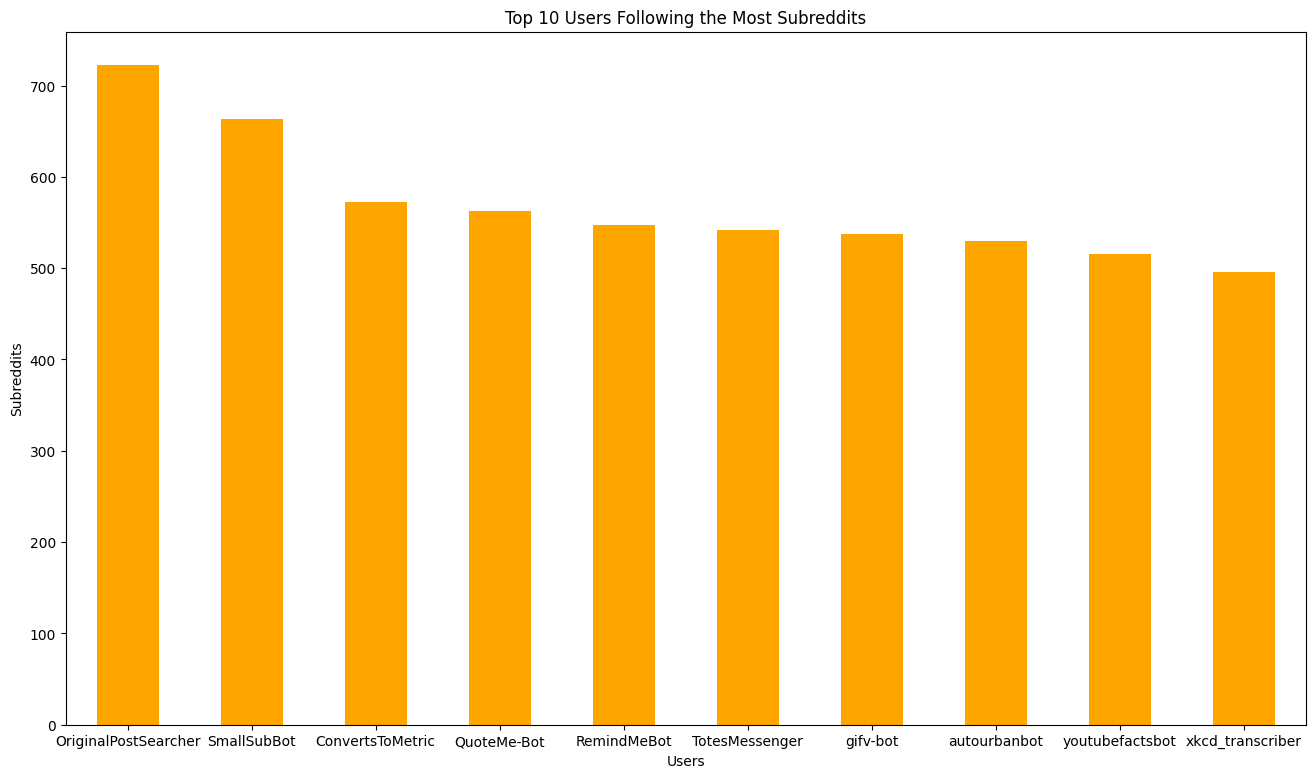

In [15]:
#Counting number of subreddits each user follows
dfcounts = dfnew['username'].value_counts().rename_axis('username').reset_index(name='tot_subs').head(10)

#Plotting the Top 10 Users following the most subreddits
plt.rcParams["figure.figsize"] = (16,9)
dfcounts.plot.bar(x='username', y='tot_subs', rot=0, legend=None, color=['orange'])
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.title('Top 10 Users Following the Most Subreddits')
plt.xlabel('Users')
plt.ylabel('Subreddits')
plt.show()

C:\Users\miao\AppData\Local\Temp\ipykernel_21012\3917306398.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfsum = dfnew.groupby(['username']).sum()


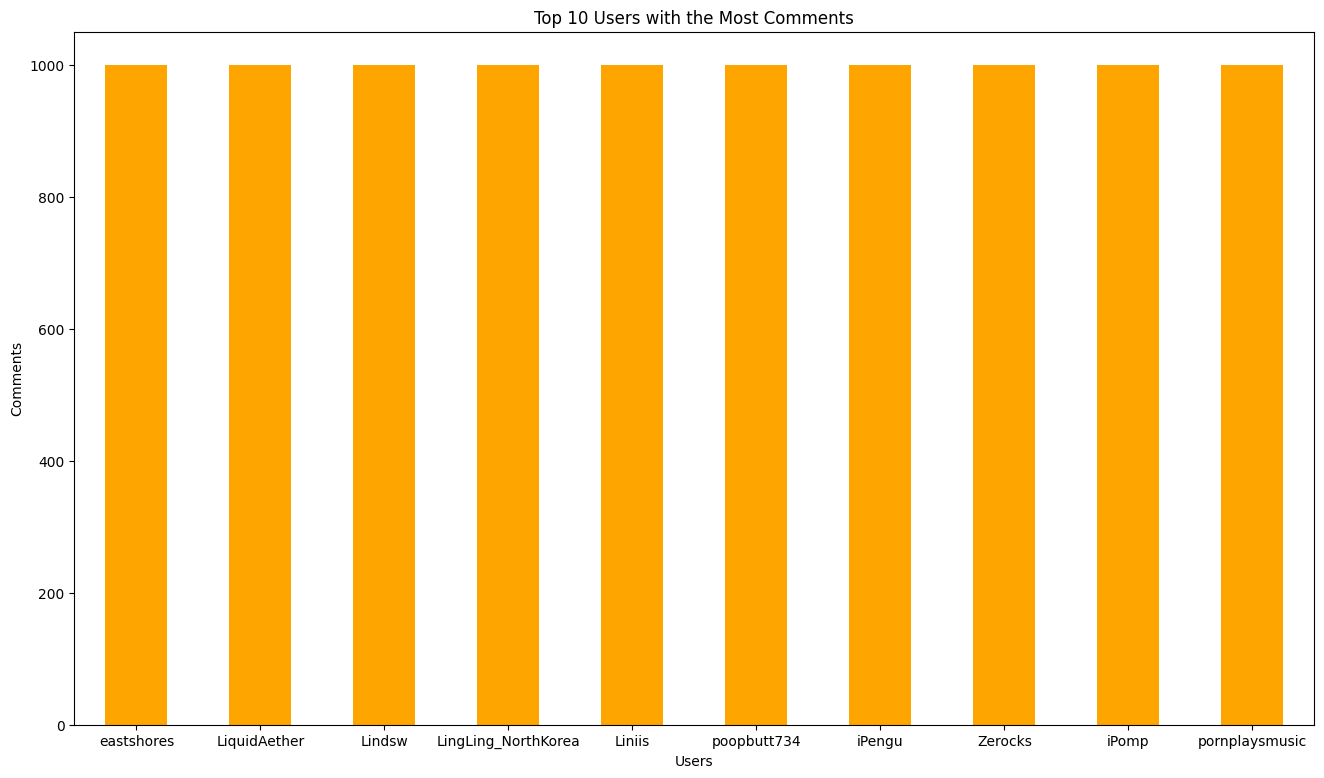

In [16]:

#Grouping by subreddit, summing by top 10 total comments
dfsum = dfnew.groupby(['username']).sum()
dfsum = dfsum[['tot_comments']].sort_values(by='tot_comments', ascending=False).head(10)

#Plotting the Top 10 Users with the Most Comments
plt.rcParams["figure.figsize"] = (16,9)
dfsum.plot.bar(y='tot_comments', rot=0, legend=None, color=['orange'])
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.title('Top 10 Users with the Most Comments')
plt.xlabel('Users')
plt.ylabel('Comments')
plt.show()

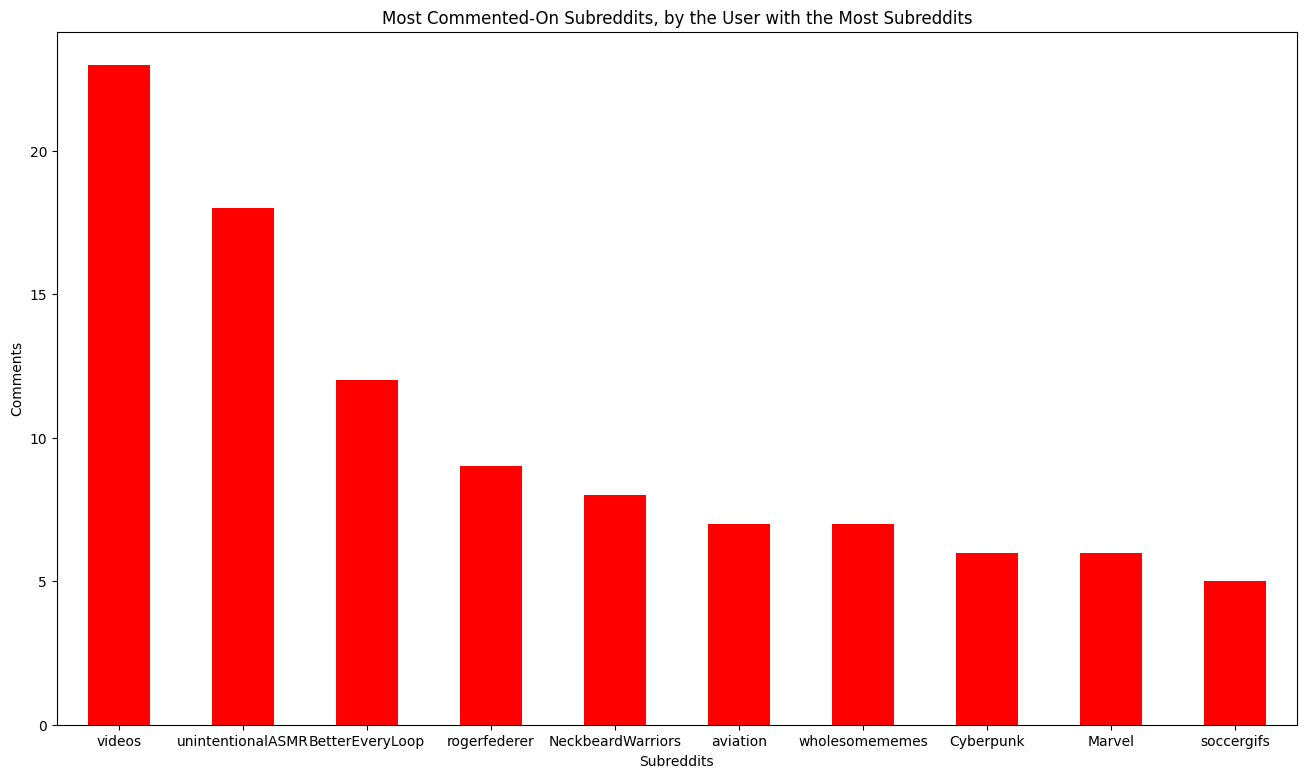

In [17]:
dftop = dfnew[dfnew.username.str.contains('OriginalPostSearcher')]
dftop = dftop.sort_values(by='tot_comments', ascending=False).head(10)

#Plotting the top 10 fav subs of the user who follows the most subs
plt.rcParams["figure.figsize"] = (16,9)
dftop.plot.bar(x='subreddit', y='tot_comments', rot=0, legend=None, color=['red'])
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.title('Most Commented-On Subreddits, by the User with the Most Subreddits')
plt.xlabel('Subreddits')
plt.ylabel('Comments')
plt.show()

In [18]:

#Create new dataframe
dfnum = dfnew

#Drop non-numerical columns
dfnew.drop(['username','subreddit','tot_comments','max_comments'], inplace=True, axis=1)

#Pivot dataframe into a matrix of total ratings for users and subs
dfrat = dfnum.pivot(index='sub_id', columns='user_id', values='rating')

#Replace all null values with 0
dfrat.fillna(0,inplace=True)

In [19]:
#Calculating number of users commenting per sub
num_users = dfnum.groupby('sub_id')['rating'].agg('count')

#Calculating number of subs per user
num_subs = dfnum.groupby('user_id')['rating'].agg('count')

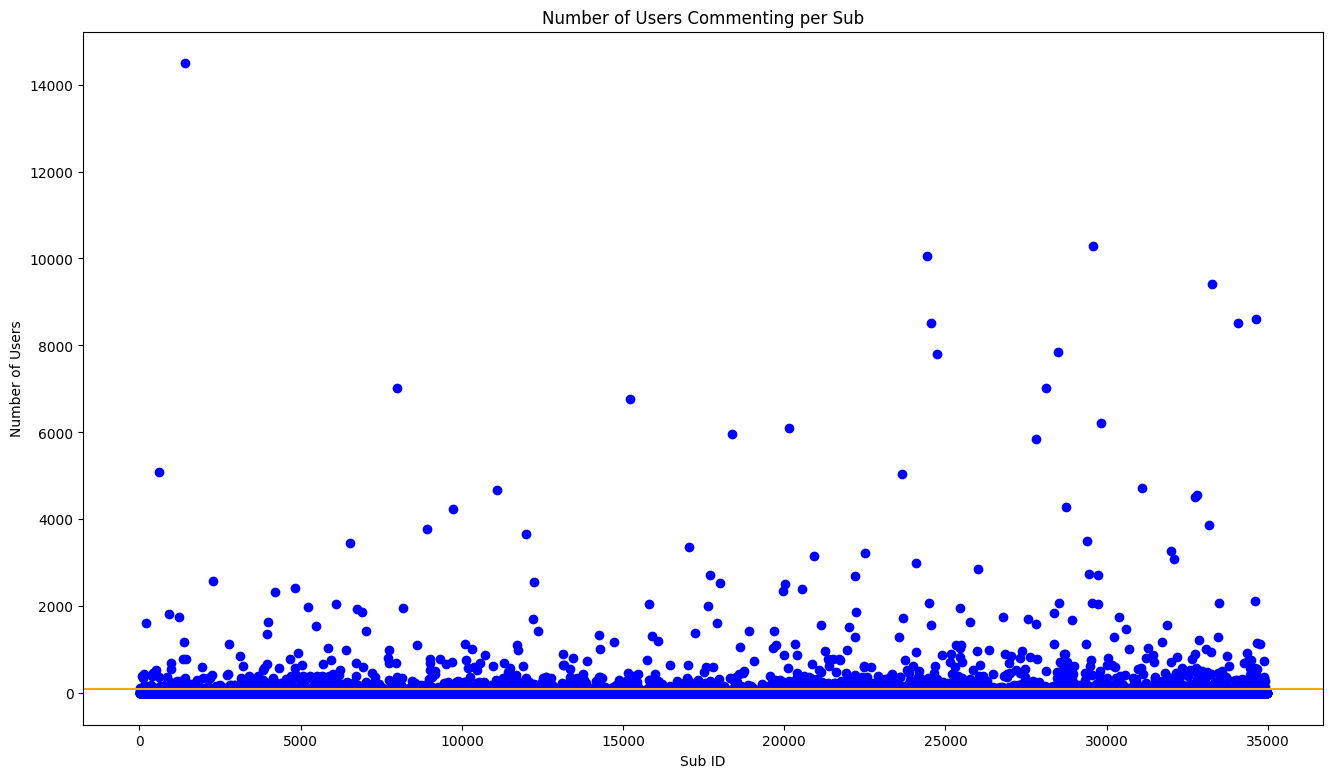

In [20]:
#Plotting number of users commenting per sub
#Drawing a line of minimum users commenting: 100
f,ax = plt.subplots(1,1,figsize=(16,9))
plt.scatter(num_users.index,num_users,color='blue')
plt.axhline(y=100,color='orange')
plt.title('Number of Users Commenting per Sub')
plt.xlabel('Sub ID')
plt.ylabel('Number of Users')
plt.show()

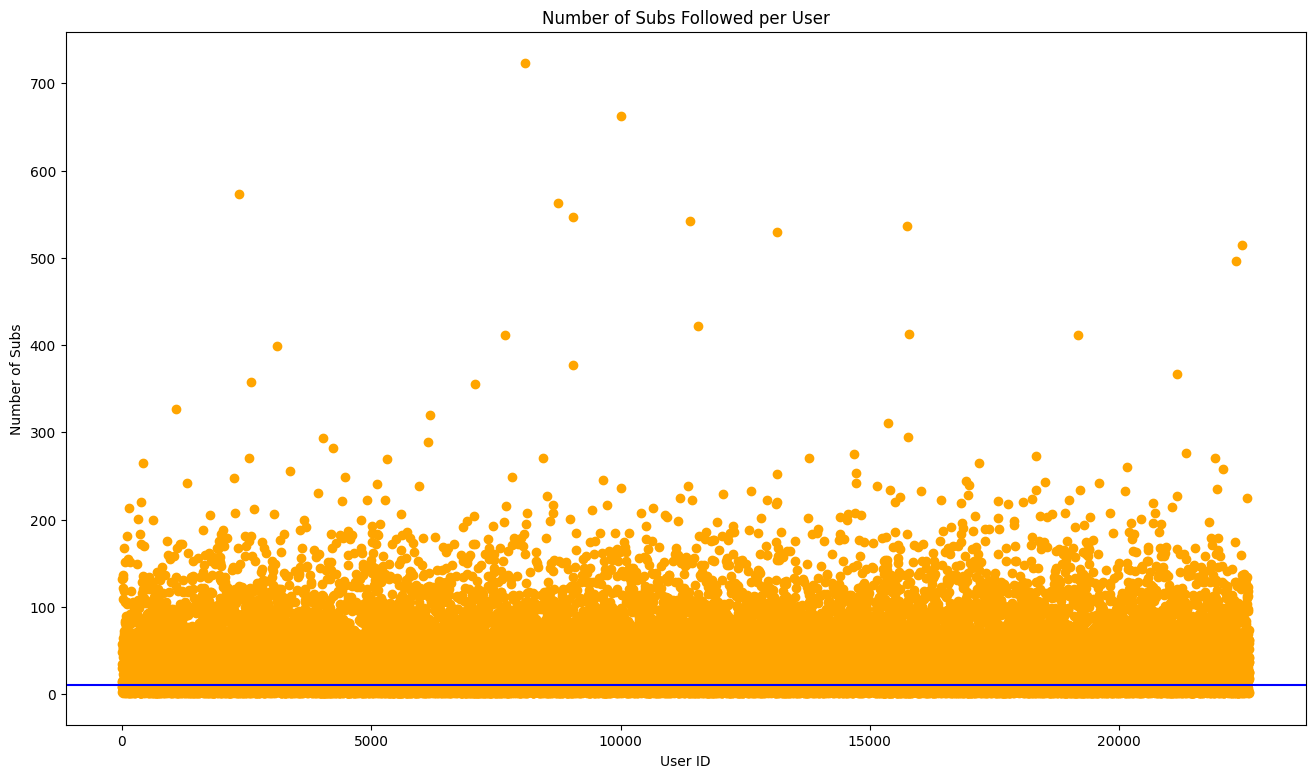

In [21]:

#Plotting number of subs followed per user
#Drawing a line of minimum subs following: 10
f,ax = plt.subplots(1,1,figsize=(16,9))
plt.scatter(num_subs.index,num_subs,color='orange')
plt.axhline(y=10,color='blue')
plt.title('Number of Subs Followed per User')
plt.xlabel('User ID')
plt.ylabel('Number of Subs')
plt.show()

In [22]:
#Limiting dataframe to only subreddits with 100 or more commenting users
dflast = dfrat.loc[num_users[num_users > 100].index,:]

#Limiting dataframe to only users following 10 or more subs
dflast = dflast.loc[:,num_subs[num_subs > 10].index]

#Removing sparsity from the ratings dataset
csr_data = csr_matrix(dflast.values)
dflast.reset_index(inplace=True)

In [23]:

#Using K-Nearest Neighbors as a similarity metric with cosine simlarity
knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
knn.fit(csr_data)

#Defining subreddit receommender function
def subreddit_recommender(sub_name):
    num_subs_to_reccomend = 10
    sub_list = dfsubs[dfsubs['subreddit'].str.contains(sub_name)]  
    if len(sub_list):        
        sub_idx = sub_list.iloc[0]['sub_id']
        sub_idx = dflast[dflast['sub_id'] == sub_idx].index[0]
        distances , indices = knn.kneighbors(csr_data[sub_idx],n_neighbors=num_subs_to_reccomend+1)    
        rec_sub_indices = sorted(list(zip(indices.squeeze().tolist(),distances.squeeze().tolist())),key=lambda x: x[1])[:0:-1]
        recommend_frame = []
        for val in rec_sub_indices:
            sub_idx = dflast.iloc[val[0]]['sub_id']
            idx = dfsubs[dfsubs['sub_id'] == sub_idx].index
            recommend_frame.append({'Subreddit':dfsubs.iloc[idx]['subreddit'].values[0],'Distance':val[1]})
        df = pd.DataFrame(recommend_frame,index=range(1,num_subs_to_reccomend+1))
        return df
    else:
        return "No subreddits found. Please check your input"

In [24]:
subreddit_recommender('AskReddit')

,Subreddit,Distance
1,AdviceAnimals,0.673353
2,gaming,0.666374
3,mildlyinteresting,0.661056
4,videos,0.639773
5,IAmA,0.637419
6,gifs,0.626443
7,Showerthoughts,0.596253
8,todayilearned,0.554709
9,funny,0.537416
10,pics,0.517912
